### Plotting NAO data ###

Plotting the NAO for the processed raw and alt_lagged data for the different forecast ranges and different summer and winter NAO.

In [1]:
# Import relevant libraries
import os
import sys
import glob
import re

# Third-party libraries
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# Import local modules
import functions as func
import nao_skill_functions as nao_func
import nao_alt_lag_functions as nao_lag_func

# Import dictionaries
sys.path.append("/home/users/benhutch/skill-maps")
import dictionaries as dicts

# Import the functions from the rose-suite-matching repository
sys.path.append("/home/users/benhutch/skill-maps/rose-suite-matching")
import nao_matching_seasons as nms_func

In [3]:
# Set up the variables
season = "ONDJFM"
forecast_range = "2-9"
start_year = 1961
end_year = 2014
lag = 4
alt_lag = True

In [4]:
# # load the hist data
# hist_data_lag = nao_lag_func.load_hist_data(
#     season="ONDJFM",
#     lag_period=True,
#     lagged_data=True,
#     lag=4,
# )

In [5]:
# # Test the other new function for hist
# nao_stats_hist = nao_lag_func.calc_nao_stats(
#     data=np.zeros_like(hist_data_lag),
#     season=season,
#     forecast_range=forecast_range,
#     start_year=start_year,
#     end_year=end_year,
#     lag=lag,
#     hist_data=hist_data_lag,
# )

In [6]:
# Load the raw data for this variable
raw_psl = nao_lag_func.load_data(
    season=season,
    forecast_range=forecast_range,
    start_year=start_year,
    end_year=end_year,
    lag=lag,
    method="new_raw",
    data_dir="/gws/nopw/j04/canari/users/benhutch/alternate-lag-processed-data/",
)

More than one file found
Using the latest datetime file: /gws/nopw/j04/canari/users/benhutch/alternate-lag-processed-data/psl_ONDJFM_global_1961_2014_2-9_4_1708533939.5692165.npy


/home/users/benhutch/skill-maps/python/nao_alt_lag_functions.py:221: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  datetimes = [pd.to_datetime(datetime, unit="s") for datetime in datetimes]


Shape of the data: (54, 178, 9, 72, 144)


In [7]:
# Load the raw data for the alternate lag
alt_lag_psl = nao_lag_func.load_data(
    season=season,
    forecast_range=forecast_range,
    start_year=start_year,
    end_year=end_year,
    lag=lag,
    method="alt_lag",
    data_dir="/gws/nopw/j04/canari/users/benhutch/alternate-lag-processed-data/",
)

More than one file found
Using the latest datetime file: /gws/nopw/j04/canari/users/benhutch/alternate-lag-processed-data/psl_ONDJFM_global_1964_2014_2-9_4_1708533939.5692165_alternate_lag.npy


/home/users/benhutch/skill-maps/python/nao_alt_lag_functions.py:124: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  datetimes = [pd.to_datetime(datetime, unit="s") for datetime in datetimes]


Shape of the data: (51, 712, 72, 144)


### Data dimensions ###

In the case of the raw data, the dimensions will be something like:

(54, 178, 9, 72, 144)

* 54 is the number of time steps (e.g. from 1961 to 2014)
* 178 is the number of ensemble members (e.g. from the full CMIP6 ensemble)
* 9 is the number of forecast years (e.g. for s1960, from 1960 to 1970)
* 72 is the number of latitudes (2.5 degree grid spacing)
* 144 is the number of longitudes (2.5 degree grid spacing)

In the case of the alternative lagged (/lagged) data, the dimensions will be something like:

(51, 712, 72, 144)

* 51 is the number of time steps (e.g. from 1964 to 2014)
* 712 is the number of lagged ensemble members (e.g. from the full lagged CMIP6 ensemble)
* 72 is the number of latitudes (2.5 degree grid spacing)
* 144 is the number of longitudes (2.5 degree grid spacing)

In [8]:
# import importlib
import importlib

# Import the function again so as not to have to restart the kernel
importlib.reload(sys.modules["nao_alt_lag_functions"])

# import the functions
from nao_alt_lag_functions import *

In [9]:
# Test the other new function
nao_stats_raw = nao_lag_func.calc_nao_stats(
    data=raw_psl,
    season=season,
    forecast_range=forecast_range,
    start_year=start_year,
    end_year=end_year,
    lag=lag,
    alt_lag=False,
    nao_matched=False,
    winter_nao_n_grid=dicts.iceland_grid_corrected,
    winter_nao_s_grid=dicts.azores_grid_corrected,
)

Using standard NAO definition
Forecast range obs: 2-9


/home/users/benhutch/.local/lib/python3.10/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/home/users/benhutch/.local/lib/python3.10/site-packages/xarray/core/groupby.py:509: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


Time dimension of obs: ['1960-12-31T00:00:00.000000000' '1961-12-31T00:00:00.000000000'
 '1962-12-31T00:00:00.000000000' '1963-12-31T00:00:00.000000000'
 '1964-12-31T00:00:00.000000000' '1965-12-31T00:00:00.000000000'
 '1966-12-31T00:00:00.000000000' '1967-12-31T00:00:00.000000000'
 '1968-12-31T00:00:00.000000000' '1969-12-31T00:00:00.000000000'
 '1970-12-31T00:00:00.000000000' '1971-12-31T00:00:00.000000000'
 '1972-12-31T00:00:00.000000000' '1973-12-31T00:00:00.000000000'
 '1974-12-31T00:00:00.000000000' '1975-12-31T00:00:00.000000000'
 '1976-12-31T00:00:00.000000000' '1977-12-31T00:00:00.000000000'
 '1978-12-31T00:00:00.000000000' '1979-12-31T00:00:00.000000000'
 '1980-12-31T00:00:00.000000000' '1981-12-31T00:00:00.000000000'
 '1982-12-31T00:00:00.000000000' '1983-12-31T00:00:00.000000000'
 '1984-12-31T00:00:00.000000000' '1985-12-31T00:00:00.000000000'
 '1986-12-31T00:00:00.000000000' '1987-12-31T00:00:00.000000000'
 '1988-12-31T00:00:00.000000000' '1989-12-31T00:00:00.000000000'
 '

In [10]:
# Test the other new function
nao_stats_lag = nao_lag_func.calc_nao_stats(
    data=alt_lag_psl,
    season=season,
    forecast_range=forecast_range,
    start_year=start_year,
    end_year=end_year,
    lag=lag,
    alt_lag=True,
    nao_matched=False,
    winter_nao_n_grid=dicts.iceland_grid_corrected,
    winter_nao_s_grid=dicts.azores_grid_corrected,
)

Using standard NAO definition
Forecast range obs: 2-9
Time dimension of obs: ['1960-12-31T00:00:00.000000000' '1961-12-31T00:00:00.000000000'
 '1962-12-31T00:00:00.000000000' '1963-12-31T00:00:00.000000000'
 '1964-12-31T00:00:00.000000000' '1965-12-31T00:00:00.000000000'
 '1966-12-31T00:00:00.000000000' '1967-12-31T00:00:00.000000000'
 '1968-12-31T00:00:00.000000000' '1969-12-31T00:00:00.000000000'
 '1970-12-31T00:00:00.000000000' '1971-12-31T00:00:00.000000000'
 '1972-12-31T00:00:00.000000000' '1973-12-31T00:00:00.000000000'
 '1974-12-31T00:00:00.000000000' '1975-12-31T00:00:00.000000000'
 '1976-12-31T00:00:00.000000000' '1977-12-31T00:00:00.000000000'
 '1978-12-31T00:00:00.000000000' '1979-12-31T00:00:00.000000000'
 '1980-12-31T00:00:00.000000000' '1981-12-31T00:00:00.000000000'
 '1982-12-31T00:00:00.000000000' '1983-12-31T00:00:00.000000000'
 '1984-12-31T00:00:00.000000000' '1985-12-31T00:00:00.000000000'
 '1986-12-31T00:00:00.000000000' '1987-12-31T00:00:00.000000000'
 '1988-12-31T

/home/users/benhutch/.local/lib/python3.10/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/home/users/benhutch/.local/lib/python3.10/site-packages/xarray/core/groupby.py:509: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


Shape of the model data: (712, 51, 72, 144)
Shape of the obs_nao: (51,)
Shape of the model nao: (712, 51)


In [11]:
nao_stats_lag.keys()

dict_keys(['obs_nao', 'model_nao_mean', 'model_nao_members', 'model_nao_members_min', 'model_nao_members_max', 'init_years', 'valid_years', 'corr1', 'p1', 'rpc1', 'rps1', 'nens'])

In [12]:
nao_stats_lag['obs_nao'].shape

(51,)

In [13]:
nao_stats_lag['model_nao_members'].shape

(712, 51)

In [14]:
# # Test the bootstrapping function
# fcsts_stats = nao_lag_func.fcsts_assess(
#     obs=nao_stats_lag['obs_nao'],
#     fcst1=nao_stats_lag['model_nao_members'],
#     fcst2=nao_stats_lag['model_nao_members'],
#     nboot=1000,
# )

In [15]:
# fcsts_stats.keys()

In [16]:
# fcsts_stats

In [17]:
import importlib

# reload the functions
importlib.reload(sys.modules["nao_alt_lag_functions"])

# import the functions
import nao_alt_lag_functions as nao_lag_func

In [18]:
# Set up the dataframe
nao_stats_df = nao_lag_func.create_nao_stats_df(
    nao_stats=nao_stats_lag,
    season=season,
    forecast_range=forecast_range,
    start_year=start_year,
    end_year=end_year,
    lag=4,
    alt_lag=True,
)


    Length of init_years: 51
    Length of valid_years: 51
    Length of obs_nao: 51
    Length of model_nao_mean: 51
    Length of model_nao_members_min: 51
    Length of model_nao_members_max: 51
    
Dataframe saved to /gws/nopw/j04/canari/users/benhutch/nao_stats_df/psl_ONDJFM_global_1961_2014_2-9_4_nao_default.csv


In [19]:
# nao_stats_df.head()

In [20]:
import importlib

# reload the functions
importlib.reload(sys.modules["nao_alt_lag_functions"])

<module 'nao_alt_lag_functions' from '/home/users/benhutch/skill-maps/python/nao_alt_lag_functions.py'>

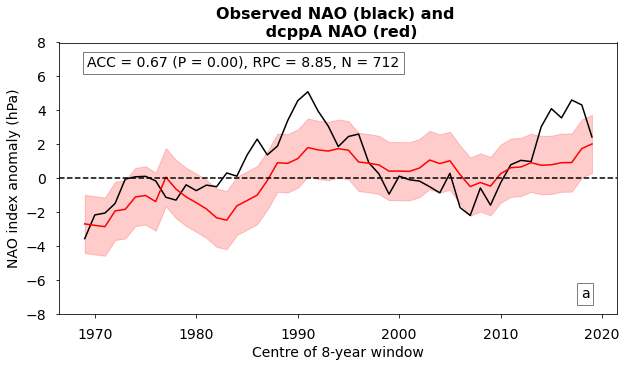

In [22]:
# # plot the nao
nao_lag_func.plot_nao(
    nao_stats=nao_stats_lag,
    season=season,
    forecast_range=forecast_range,
    lag=lag,
    alt_lag=True,
    figsize_x=10,
    figsize_y=5,
    ylim_min=-8,
    ylim_max=8,
    title="Observed NAO (black) and \n dcppA NAO (red)",
    ylabel="NAO index anomaly (hPa)",
    label="a",
    fontsize=14,
)

In [34]:
# import importlib
import importlib

# reload the functions
importlib.reload(sys.modules["nao_alt_lag_functions"])

<module 'nao_alt_lag_functions' from '/home/users/benhutch/skill-maps/python/nao_alt_lag_functions.py'>

dpi: 100
px: 0.01
figsize_x: 18.0
figsize_y: 5.0
Total size: 90.0


/home/users/benhutch/skill-maps/python/nao_alt_lag_functions.py:1532: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplot.set_xticklabels(labels)


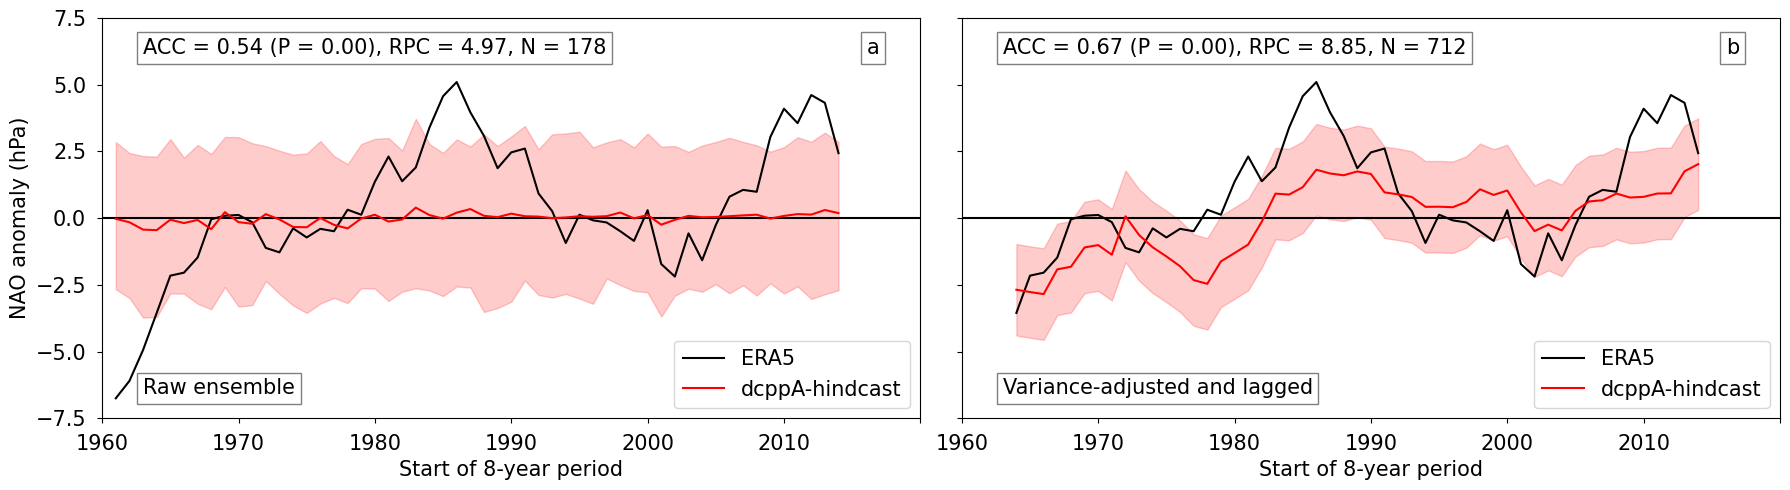

In [35]:
# Plot the NAO
nao_lag_func.plot_nao_subplots(
    nao_stats_1=nao_stats_raw,
    nao_stats_2=nao_stats_lag,
    method_1="Raw ensemble",
    method_2="Variance-adjusted and lagged",
    season=season,
    forecast_range=forecast_range,
    lag=lag,
    figsize_x_px=1800,
    figsize_y_px=500,
    dpi=100,
    fontsize=15,
    save_dpi=1000,
    fig_labels=["a", "b"],
)

In [22]:
# how could we break this down into individual models? - does depresys have second winter skill?
# do november init models have second winter skill?